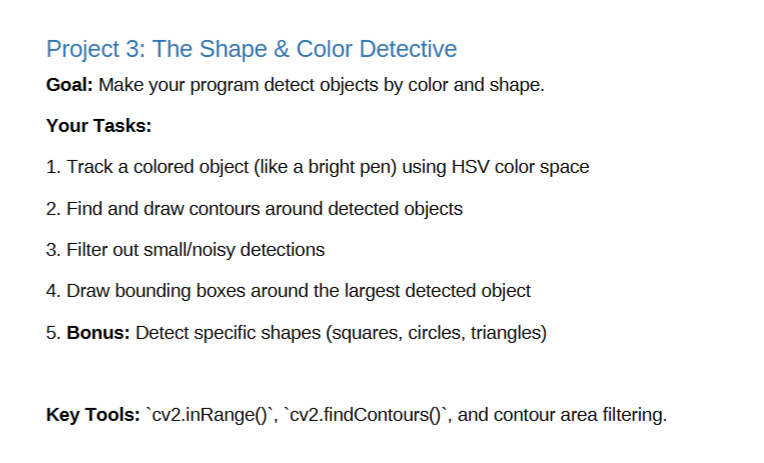

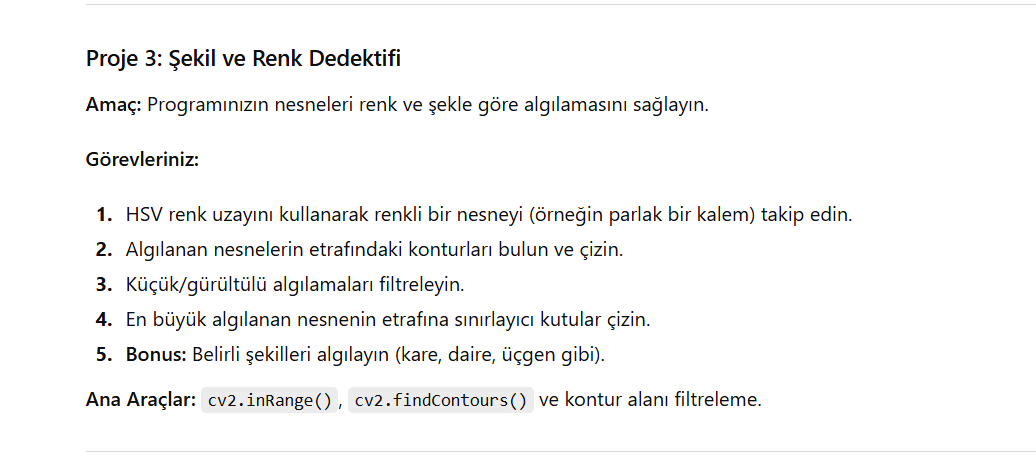

In [1]:
import cv2 as cv
import numpy as np

In [4]:
def nothing(a):
    pass

capture = cv.VideoCapture(0)
cv.namedWindow("Trackbars")
cv.namedWindow("Trackbars")
cv.resizeWindow("Trackbars",640,300)
cv.createTrackbar("Hue Min","Trackbars",0,179,nothing)
cv.createTrackbar("Hue Max","Trackbars",179,179,nothing)
cv.createTrackbar("Satur Min","Trackbars",0,255,nothing)
cv.createTrackbar("Satur Max","Trackbars",255,255,nothing)
cv.createTrackbar("Value Min","Trackbars",0,255,nothing)
cv.createTrackbar("Value Max","Trackbars",255,255,nothing)

while True:
    set , frame = capture.read()
    #Burada BGR HSV değerlerine dönüşüyor
    capHSV = cv.cvtColor(frame,cv.COLOR_BGR2HSV)
    #Trackbars değerlerini anlık olarak alıyoruz
    h_min = cv.getTrackbarPos("Hue Min","Trackbars")
    h_max = cv.getTrackbarPos("Hue Max","Trackbars")
    s_min = cv.getTrackbarPos("Satur Min","Trackbars")
    s_max = cv.getTrackbarPos("Satur Max","Trackbars")
    v_min = cv.getTrackbarPos("Value Min","Trackbars")
    v_max = cv.getTrackbarPos("Value Max","Trackbars")
    #Hangi renk için maskeleme yapmak istiyorsak onun max değerlerini 
    # Trackbars üzerinde bulup ayarlayıp her renk için bu kodu çalıştırabiliriz
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    mask = cv.inRange(capHSV,lower,upper)
    contours, hierarchy = cv.findContours(mask,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(capHSV,contours,-1,(0,255,0),2)
    cv.imshow("Masked",mask)
    cv.imshow("Image",capHSV)
    if cv.waitKey(25) & 0xFF == ord("q"):
        break
    
cv.imshow("hsv",capHSV)
cv.waitKey(0)
cv.destroyAllWindows()


In [8]:
def nothing(a):
    pass

# Kamera başlat
capture = cv.VideoCapture(0)

# Trackbar penceresi
cv.namedWindow("Trackbars")
cv.resizeWindow("Trackbars", 640, 300)

# HSV Trackbar'ları
cv.createTrackbar("Hue Min", "Trackbars", 0, 179, nothing)
cv.createTrackbar("Hue Max", "Trackbars", 179, 179, nothing)
cv.createTrackbar("Satur Min", "Trackbars", 0, 255, nothing)
cv.createTrackbar("Satur Max", "Trackbars", 255, 255, nothing)
cv.createTrackbar("Value Min", "Trackbars", 0, 255, nothing)
cv.createTrackbar("Value Max", "Trackbars", 255, 255, nothing)

while True:
    ret, frame = capture.read()
    if not ret:
        break

    # BGR → HSV dönüşümü (sadece işlem için)
    capHSV = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # Trackbar değerlerini oku
    h_min = cv.getTrackbarPos("Hue Min", "Trackbars")
    h_max = cv.getTrackbarPos("Hue Max", "Trackbars")
    s_min = cv.getTrackbarPos("Satur Min", "Trackbars")
    s_max = cv.getTrackbarPos("Satur Max", "Trackbars")
    v_min = cv.getTrackbarPos("Value Min", "Trackbars")
    v_max = cv.getTrackbarPos("Value Max", "Trackbars")

    # HSV maskeleme aralığı
    lower = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])

    # Maske oluştur
    mask = cv.inRange(capHSV, lower, upper)

    # Maskede kontur bul
    contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Konturları NORMAL görüntü üzerine çiz
    cv.drawContours(frame, contours, -1, (0, 255, 0), 2)

    # Pencereleri göster
    cv.imshow("Masked", mask)   # Siyah-beyaz maske
    cv.imshow("Image", frame)   # NORMAL kamera görüntüsü (BGR)

    # Çıkış
    if cv.waitKey(1) & 0xFF == ord("q"):
        break

capture.release()
cv.destroyAllWindows()


In [9]:

def nothing(a):
    pass

# Kamera başlat
capture = cv.VideoCapture(0)

# Trackbar penceresi
cv.namedWindow("Trackbars")
cv.resizeWindow("Trackbars", 640, 300)

# HSV Trackbar'ları
cv.createTrackbar("Hue Min", "Trackbars", 0, 179, nothing)
cv.createTrackbar("Hue Max", "Trackbars", 179, 179, nothing)
cv.createTrackbar("Satur Min", "Trackbars", 0, 255, nothing)
cv.createTrackbar("Satur Max", "Trackbars", 255, 255, nothing)
cv.createTrackbar("Value Min", "Trackbars", 0, 255, nothing)
cv.createTrackbar("Value Max", "Trackbars", 255, 255, nothing)

while True:
    ret, frame = capture.read()
    if not ret:
        break

    # BGR → HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # Trackbar değerleri
    h_min = cv.getTrackbarPos("Hue Min", "Trackbars")
    h_max = cv.getTrackbarPos("Hue Max", "Trackbars")
    s_min = cv.getTrackbarPos("Satur Min", "Trackbars")
    s_max = cv.getTrackbarPos("Satur Max", "Trackbars")
    v_min = cv.getTrackbarPos("Value Min", "Trackbars")
    v_max = cv.getTrackbarPos("Value Max", "Trackbars")

    # Maskeleme aralığı
    lower = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])

    # Maske
    mask = cv.inRange(hsv, lower, upper)

    # Kontur bulma
    contours, hierarchy = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Gürültüleri filtrelemek için minimum alan
    min_area = 500

    biggest_contour = None
    biggest_area = 0

    for cnt in contours:
        area = cv.contourArea(cnt)

        if area < min_area:
            continue  # küçük gürültüyü atla

        # EN BÜYÜK KONTURU BUL
        if area > biggest_area:
            biggest_area = area
            biggest_contour = cnt

        # ŞEKİL ALGILAMA
        peri = cv.arcLength(cnt, True)
        approx = cv.approxPolyDP(cnt, 0.02 * peri, True)
        x, y, w, h = cv.boundingRect(approx)

        shape = "Unknown"
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            shape = "Square"
        elif len(approx) > 6:
            shape = "Circle"

        # Çizim
        cv.drawContours(frame, [cnt], -1, (0, 255, 0), 2)
        cv.putText(frame, shape, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 255, 0), 2)

    # EN BÜYÜK KONTURA KUTU ÇİZ
    if biggest_contour is not None:
        x, y, w, h = cv.boundingRect(biggest_contour)
        cv.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        cv.putText(frame, "Largest Object", (x, y - 20),
                    cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # GÖSTER
    cv.imshow("Masked", mask)
    cv.imshow("Image", frame)

    if cv.waitKey(1) & 0xFF == ord("q"):
        break

capture.release()
cv.destroyAllWindows()
